# Buchungsvorlauf

In [108]:
################################################################################
# make imports from pa_lib possible (parent directory of file's directory)

import sys
from pathlib import Path

file_dir = Path.cwd()
parent_dir = file_dir.parent
sys.path.append(str(parent_dir))

print(f"file_dir   = {file_dir}")
print(f"parent_dir = {parent_dir}")

################################################################################
import pandas as pd
import numpy as np

################################################################################
from collections import namedtuple

################################################################################
## PA_LIB toolbox:

from pa_lib.file import (
    store_bin,
    project_dir,
    data_files,
    load_csv,
    load_bin,
    write_xlsx,
    load_txt,
)

from pa_lib.data import (
    as_dtype,
    dtFactor,
    desc_col,
    lookup,
    clean_up_categoricals,
    calc_col_partitioned,
)

from pa_lib.util import (
    collect,
    value,
    flatten,
    normalize_rows,
    list_items,
    iso_to_datetime,
)

from pa_lib.log import time_log

from pa_lib.types import Record

from pa_lib.vis import boxplot_histogram

################################################################################
# display long columns completely, show more rows:

pd.set_option("display.max_colwidth", 300)
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)
################################################################################

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_dir   = C:\Users\stc\Documents\GitHub\PredictiveAnalyticsPython\mediafocus
parent_dir = C:\Users\stc\Documents\GitHub\PredictiveAnalyticsPython


## Load data

In [3]:
bd_data = load_bin("vkprog\\bd_data.feather")

09:06:11 [INFO] Started loading binary file ...
09:06:11 [INFO] Reading from file C:\Users\stc\data\vkprog\bd_data.feather
09:06:12 [INFO] ... finished loading binary file in 0.35s (0.77s CPU)


In [4]:
bd_data.shape

(1607708, 54)

In [24]:
row_select = (bd_data.KAMPAGNEN_STATUS != 3) & (bd_data.BRUTTO > 0)

In [43]:
branch_columns = [
    ele for ele in bd_data.columns if ("BRANCH" in ele and "_ID" not in ele)
]

In [44]:
desc_col(bd_data.loc[:,branch_columns])

,DTYPE,NULLS,UNIQUE
ENDKUNDE_BRANCHENGRUPPE,category,14269/1593439,83
ENDKUNDE_NBRANCHENGRUPPE,category,1362086/245622,64
ENDKUNDE_BRANCHENKAT,category,14269/1593439,22
ENDKUNDE_NBRANCHENKAT,category,1362086/245622,22
AUFTRAG_BRANCHENGRUPPE,category,0/1607708,83
AUFTRAG_NBRANCHENGRUPPE,category,1474344/133364,80
AUFTRAG_BRANCHENKAT,category,0/1607708,22
AUFTRAG_NBRANCHENKAT,category,1474385/133323,22


In [121]:
bd_data.groupby("AUFTRAGSART").agg({"KV_NR": "count"})

,KV_NR
AUFTRAGSART,
Aushangauftrag Partner,12435
Eigenwerbung APG,5995
Freespace,10226
Goodwill,1575
Karitativ,10393
Kommerziell,1114280
Logistik für Dritte,15485
Politisch,81922
Promotion,48375


In [26]:
bd_data.loc[row_select,:].sample(5)

,ENDKUNDE_NR,ENDKUNDE,EK_ABC,EK_BONI,EK_PLZ,EK_ORT,EK_LAND,EK_HB_APG_KURZZ,EK_KAM_BETREUT,EK_AKTIV,AGENTUR,AG_HAUPTBETREUER,VERKAUFSBERATER,ENDKUNDE_BRANCHENGRUPPE_ID,ENDKUNDE_BRANCHENGRUPPE,ENDKUNDE_NBRANCHENGRUPPE_ID,ENDKUNDE_NBRANCHENGRUPPE,ENDKUNDE_BRANCHENKAT_ID,ENDKUNDE_BRANCHENKAT,ENDKUNDE_NBRANCHENKAT_ID,ENDKUNDE_NBRANCHENKAT,AUFTRAG_BRANCHENGRUPPE_ID,AUFTRAG_BRANCHENGRUPPE,AUFTRAG_NBRANCHENGRUPPE_ID,AUFTRAG_NBRANCHENGRUPPE,AUFTRAG_BRANCHENKAT_ID,AUFTRAG_BRANCHENKAT,AUFTRAG_NBRANCHENKAT_ID,AUFTRAG_NBRANCHENKAT,AGPS_NR,SEGMENT,KV_NR,KV_TYP,KAMPAGNEN_STATUS,KAMPAGNE_ERFASSUNGSDATUM,KAMPAGNE_BEGINN,AUFTRAGSART,RES_DAT,ANNULLATION_DATUM,AUSH_VON,DAUER,VERTRAG,BRUTTO,NETTO,AGGLO,PF,KAMP_BEGINN_JAHR,KAMP_BEGINN_KW,KAMP_BEGINN_KW_2,KAMP_BEGINN_KW_4,KAMP_ERFASS_JAHR,KAMP_ERFASS_KW,KAMP_ERFASS_KW_2,KAMP_ERFASS_KW_4
653803,598271,Save the Children,A,gut,8005,Zürich,SCHWEIZ,NIE,0,1,NaN,NaN,BAP,780,WG - Industrie / Verbände,NaN,NaN,18,WB - Investition / Industrie,NaN,NaN,780,WG - Industrie / Verbände,NaN,NaN,18,WB - Investition / Industrie,NaN,NaN,2751866,Promotion,959520,KPG,4,2018-07-17,2018-08-02,Kommerziell,2018-07-17,NaT,2018-08-16,1,Nein,280,280,"90306,90329,90404,91103,91362,91372,92407,93293,93339,94946,95401,95822,96800,A0230,A0261,A0351,A0371,A0942,A1061,A1630,A1711,A2196,A2546,A2581,A2601,A2701,A2939,A3203,A3271,A3336,A3425,A3901,A4001,A4021,A4082,A4201,A4436,A4566,A5002,A5192,A5586,A5890,A5938,A6002,A6136,A6153,A6248,A6266,A6421,A6...","City eBoard,City ePanel,F12,F200,F200L,F200LR,F4C,F4M,Fundraising,Rail Beamer,Rail eBoard,Rail ePanel,Sampling,Shopping ePanel",2018,31,31,29,2018,29,29,29
518652,522547,Breitenbach Schliesstechnik GmbH,E,gut,5734,Reinach AG,SCHWEIZ,PAL,0,1,NaN,NaN,FGR,556,WG - Hausbau / Ausstattung,NaN,NaN,17,WB - Haus / Garten,NaN,NaN,720,WG - Dienstleistung,NaN,NaN,15,WB - Dienstleistung,NaN,NaN,1426795,APG|SGA,652815,KDVTLG,4,2011-06-09,2011-10-17,langfristiger Vertrag,2011-06-09,NaT,2011-10-17,364,Ja,4300,4300,94141,F12,2011,42,41,41,2011,23,23,21
113596,514388,SCB Eishockey AG,C,gut,3014,Bern,SCHWEIZ,CFU,0,1,Republica AG,YAM,YAM,990,WG - Veranstaltungen,NaN,NaN,22,WB - Veranstaltungen,NaN,NaN,990,WG - Veranstaltungen,NaN,NaN,22,WB - Veranstaltungen,NaN,NaN,2948798,Digital Sales,995908,KPG,4,2019-04-24,2019-04-26,Kommerziell,2019-04-24,NaT,2019-04-26,2,Nein,4314,0,"A0261,A0351,A0942,A2701,A5586,A6621","Dachlängsformat,F12,F12L,F200,F200L,F200LR,F24,F4C,F4M,Ganzheck,Hängekarton,Hängekarton mit Dispenser,Rail eBoard,Rail ePanel,RailBoard,TrafficMediaScreen",2019,17,17,17,2019,17,17,17
1494354,100641,AC Automobile Schweiz AG,KA,gut,8952,Schlieren,SCHWEIZ,DEA,1,1,OMD Schweiz AG,FER,FER,400,WG - Automarkt,NaN,NaN,13,WB - Verkehr,NaN,NaN,400,WG - Automarkt,NaN,NaN,13,WB - Verkehr,NaN,NaN,1145828,APG|SGA,572440,KPG,4,2009-07-14,2009-08-31,Kommerziell,2009-08-07,NaT,2009-08-31,14,Nein,696,522,"90306,90329,90404,90412,90768,91103,91301,91362,91372,91407,91509,92275,92407,92583,93293,93339,93379,93402,93787,93851,93955,94141,94304,94946,95401,95822,96800,A0230,A0261,A0351,A0371,A0581,A0942,A1061,A1201,A1344,A1630,A1711,A2125,A2196,A2546,A2581,A2601,A2701,A2939,A3203,A3251,A3271,A3336,A3...","BrandingWall,City eBoard,City ePanel,Escalator ePanel,F12,F12L,F12LR,F200,F200L,F200LR,F24,Ganzheck,MegaPoster,MegaPosterL,Promotion,Rail Beamer,Rail eBoard,Rail ePanel,Shopping ePanel,Teilheck Fenster,Time-/InformationBoard,TrafficBoard,TrafficBoardF24,TrafficBoardF24 Medium,TrafficBoardF24 Midi",2009,36,35,33,2009,29,29,29
879535,144190,HSO Wirtschaftsschule Schweiz AG,A,gut,8050,Zürich,SCHWEIZ,CGA,0,1,NaN,NaN,CGA,420,WG - Ausbildung,NaN,NaN,15,WB - Dienstleistung,NaN,NaN,420,WG - Ausbildung,NaN,NaN,15,WB - Dienstleistung,NaN,NaN,2272842,APG|SGA,864211,KPG,4,2016-05-11,2016-06-20,Kommerziell,2016-05-11,NaT,2016-07-25,14,Nein,4746,4271,"90306,90404,90412,90768,91103,91301,91372,91509,92407,93293,93339,93379,93402,93955,A0230,A0261,A0351,A0371,A0581,A0942,A1061,A1344,A1630,A1711,A2196,A2546,A2581,A2601,A2701,A3203,A3251,

In [45]:
buvo_columns = "ENDKUNDE_NR ENDKUNDE AUFTRAG_BRANCHENGRUPPE AUFTRAG_BRANCHENKAT KAMPAGNE_ERFASSUNGSDATUM KAMPAGNE_BEGINN BRUTTO NETTO".split()

In [46]:
bd_buvo = bd_data.loc[row_select,buvo_columns]

In [47]:
desc_col(bd_buvo, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,int64,0/770801,33142,11.8 MB,"[100034,661771]"
ENDKUNDE,category,0/770801,31084,13.2 MB,"[ IWIKO - Institut für Wirtschafts-Komm.,ô quai des arts]"
AUFTRAG_BRANCHENGRUPPE,category,0/770801,83,6.6 MB,"[WG - Alkoholfreie Getränke,WG - Zweiradindustrie]"
AUFTRAG_BRANCHENKAT,category,0/770801,22,6.6 MB,"[WB - Behörden / Politik,WB - Verkehr]"
KAMPAGNE_ERFASSUNGSDATUM,datetime64[ns],0/770801,3370,11.8 MB,"[2007-04-04 00:00:00,2019-11-30 00:00:00]"
KAMPAGNE_BEGINN,datetime64[ns],0/770801,2561,11.8 MB,"[2008-03-01 00:00:00,2021-03-01 00:00:00]"
BRUTTO,int64,0/770801,40839,11.8 MB,"[1,1909799]"
NETTO,int64,0/770801,32415,11.8 MB,"[-9548,752872]"


In [48]:
bd_buvo.loc[:, "BuVo"] = bd_buvo.KAMPAGNE_BEGINN - bd_buvo.KAMPAGNE_ERFASSUNGSDATUM

In [49]:
bd_buvo.sample(4)

,ENDKUNDE_NR,ENDKUNDE,AUFTRAG_BRANCHENGRUPPE,AUFTRAG_BRANCHENKAT,KAMPAGNE_ERFASSUNGSDATUM,KAMPAGNE_BEGINN,BRUTTO,NETTO,BuVo
1185989,465393,Dicro Sanitaire SA,WG - Hausbau / Ausstattung,WB - Haus / Garten,2015-07-01,2015-10-01,1200,1200,92 days
357383,507295,Eventmakers AG,WG - Dienstleistung,WB - Dienstleistung,2011-01-12,2011-01-25,1000,1000,13 days
865973,592781,Obrist Augenoptik AG,WG - Optik / Sehen / Hören,WB - Unterhaltungselektronik / Foto,2016-04-11,2016-09-05,768,768,147 days
898153,101832,Unilever Schweiz GmbH,WG - Tiefkühlprodukte,WB - Nahrungsmittel,2016-12-08,2017-02-27,2520,2016,81 days


In [88]:
stacking_buvo = pd.melt(
    bd_buvo,  # dataframe
    id_vars=[
        "ENDKUNDE_NR",
        "ENDKUNDE",
        "KAMPAGNE_ERFASSUNGSDATUM",
        "KAMPAGNE_BEGINN",
        "BRUTTO",
        "NETTO",
        "BuVo",
    ],  # Keep this columns
    value_vars=[
        "AUFTRAG_BRANCHENGRUPPE",
        "AUFTRAG_BRANCHENKAT",
    ],  # columns to be stacked
    var_name="KAT_or_GRP",  # Save column-names of stacked columns under this name
    value_name="APG_Branche",  # Save values in the stacked columns under this name
)

stacking_buvo.loc[:, "APG_Branche"] = stacking_buvo.APG_Branche.map(
    lambda branche: branche[5:]
)

buvo_df = stacking_buvo.loc[
    :,
    "ENDKUNDE_NR ENDKUNDE KAMPAGNE_ERFASSUNGSDATUM KAMPAGNE_BEGINN BRUTTO NETTO BuVo APG_Branche".split(),
].drop_duplicates()

KW_Aushang = buvo_df.KAMPAGNE_BEGINN.map(lambda x: x.isocalendar()[1])
buvo_df.loc[:, "KW_Aushang"] = KW_Aushang

buvo_df.loc[:,"BuVo"] = buvo_df.BuVo.dt.days


In [89]:
display(buvo_df.sample(4))

,ENDKUNDE_NR,ENDKUNDE,KAMPAGNE_ERFASSUNGSDATUM,KAMPAGNE_BEGINN,BRUTTO,NETTO,BuVo,APG_Branche,KW_Aushang
184399,498783,Volg Konsumwaren AG,2018-10-04,2019-01-21,4903,3530,109,Handel / Grossverteiler,4
116777,477335,Mairie d'Evian,2011-10-13,2012-02-06,2825,2825,116,Veranstaltungen,6
222670,469165,Lidl Schweiz DL AG,2019-02-22,2019-03-04,625,0,10,Handel / Grossverteiler,10
1074579,520597,Herzog Küchen AG,2015-08-20,2015-09-14,1276,1021,25,Haus / Garten,38


In [90]:
desc_col(buvo_df)

,DTYPE,NULLS,UNIQUE
ENDKUNDE_NR,int64,0/1124667,33142
ENDKUNDE,category,0/1124667,31084
KAMPAGNE_ERFASSUNGSDATUM,datetime64[ns],0/1124667,3370
KAMPAGNE_BEGINN,datetime64[ns],0/1124667,2561
BRUTTO,int64,0/1124667,40839
NETTO,int64,0/1124667,32415
BuVo,int64,0/1124667,548
APG_Branche,object,0/1124667,102
KW_Aushang,int64,0/1124667,53


# Data Exploration

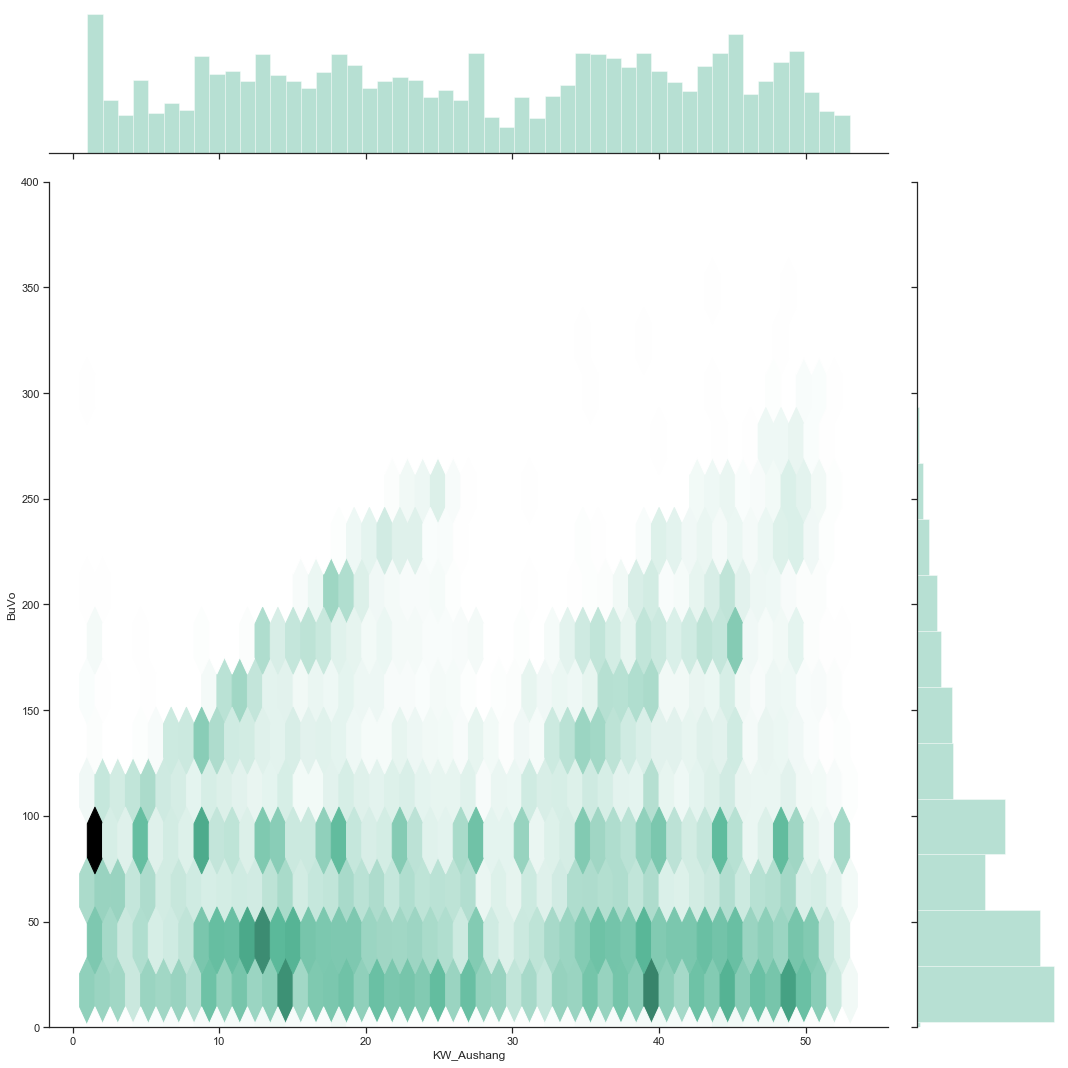

In [107]:
sns.axes_style("darkgrid")
sns.jointplot(
    x="KW_Aushang",
    y="BuVo",
    data=buvo_df,
    kind="hex", # hex kde
    color="#4CB391",
    height=15,
    ylim=(0,400),
)

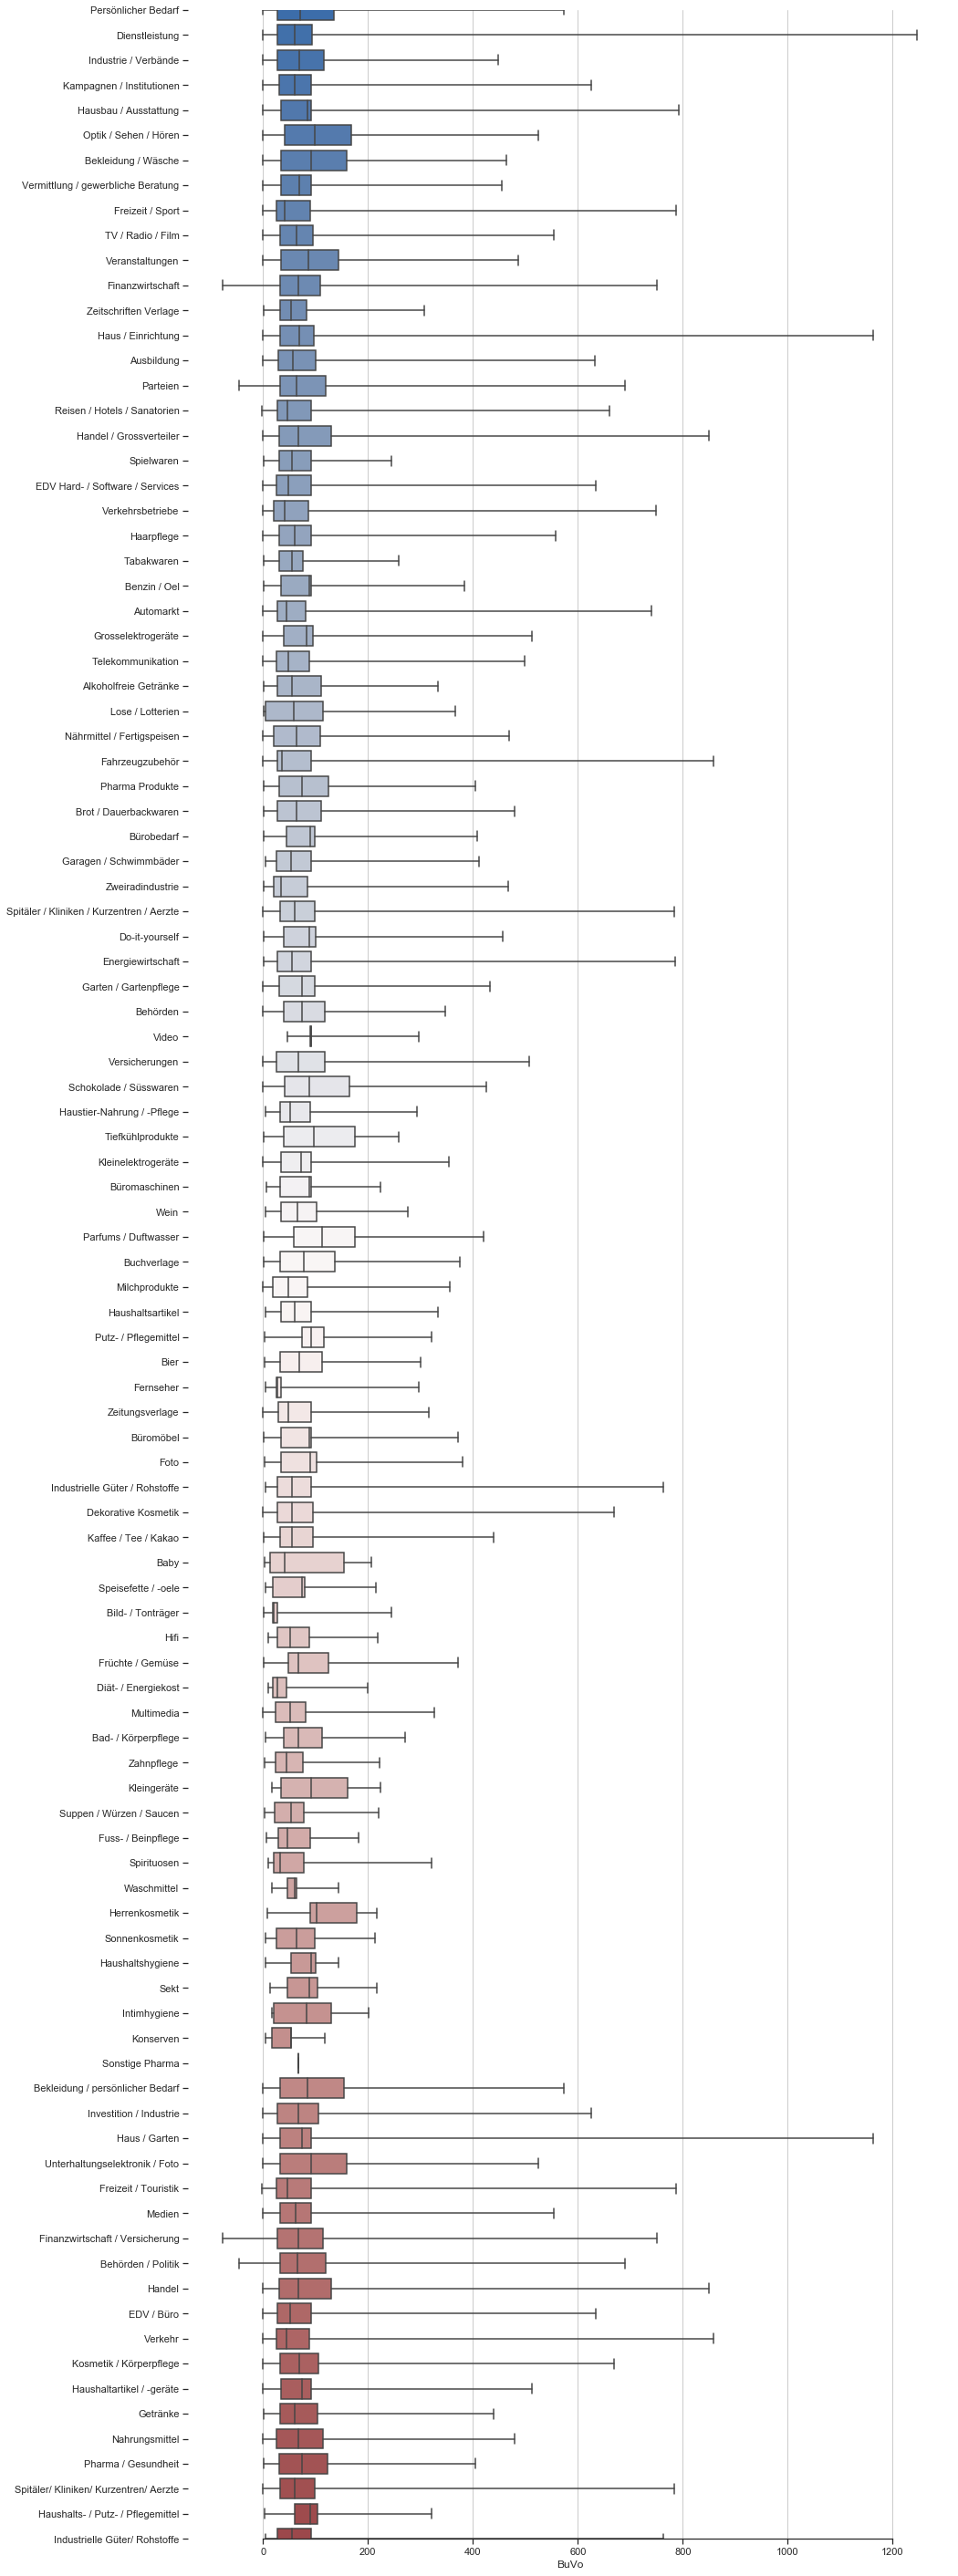

In [118]:
anz_branches  = len(set(buvo_df.APG_Branche))

sns.set(style="ticks")

f, ax = plt.subplots(figsize=(15, anz_branches//2))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="BuVo", y="APG_Branche", data=buvo_df,
            whis="range", palette="vlag")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [112]:
2+2

4